In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

## Preparing the data

In [3]:
data_train = pd.read_csv("BlogFeedback/blogData_train.csv", header=None)

In [4]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [5]:
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000
mean,39.444167,46.806717,0.358914,339.853102,24.681661,15.214611,27.959159,0.002748,258.666030,5.829151,...,0.171327,0.162242,0.154455,0.096151,0.088917,0.119167,0.0,1.242094,0.769505,6.764719
std,79.121821,62.359996,6.840717,441.430109,69.598976,32.251189,38.584013,0.131903,321.348052,23.768317,...,0.376798,0.368676,0.361388,0.294800,0.284627,1.438194,0.0,27.497979,20.338052,37.706565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.285714,5.214318,0.000000,29.000000,0.000000,0.891566,3.075076,0.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,10.630660,19.353120,0.000000,162.000000,4.000000,4.150685,11.051215,0.000000,121.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.304670,77.442830,0.000000,478.000000,15.000000,15.998589,45.701206,0.000000,387.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1122.666600,559.432600,726.000000,2044.000000,1314.000000,442.666660,359.530060,14.000000,1424.000000,588.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,136.000000,0.0,1778.000000,1778.000000,1424.000000


### Finding missing values 

In [6]:
print("Number of NA: ",data_train.isnull().any().sum())


Number of NA:  0


##### Cleaning of the data is not needed 

Combining all test files into one

In [7]:
testCSVfiles = glob.glob("BlogFeedback/test"+ "/*.csv")
data_test = pd.DataFrame()
for file in testCSVfiles:
    data_test = data_test.append(pd.read_csv(file, header=None))

In [8]:
data_test.to_csv("BlogFeedback/test.csv")

## Exploratory data analysis

In [9]:
row,col = data_train.shape
print("Number of individuals:", row)
print("Number of features:", col)

Number of individuals: 52397
Number of features: 281


#### Representation of correlation matrix

<Figure size 7200x7200 with 0 Axes>

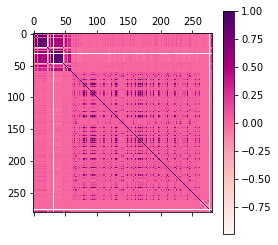

In [10]:
plt.pyplot.figure(figsize=(100,100))
plt.pyplot.matshow(data_train.corr(),cmap='RdPu')
plt.pyplot.colorbar()
plt.pyplot.show()

From the plot we can see that the most correlated features are in the range of 0...62

<Figure size 7200x7200 with 0 Axes>

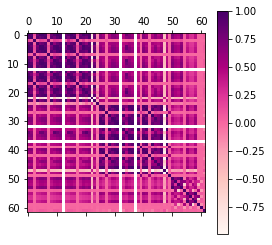

In [11]:
part_data = data_train.iloc[:,0:62]
plt.pyplot.figure(figsize=(100,100))
plt.pyplot.matshow(part_data.corr(),cmap='RdPu')
plt.pyplot.colorbar()
plt.pyplot.show()

### Figuring out the most correlated attributes with dependent variable

In [12]:
maxvalues = data_train.corr()[280].nlargest(5)
maxvalues

280    1.000000
9      0.506540
20     0.503375
5      0.497631
4      0.491707
Name: 280, dtype: float64

<b>This variables are the most correlated with our target-the number of comments in the next 24h</b>

4 - median of the total number of coments before basetime<br>
5 - average of number of comments in the last 24h before the basetime<br>
9 - median of number of comments in the last 24h before the basetime<br>
20 - average of the difference between number of comments during 24h<br>

<StemContainer object of 3 artists>

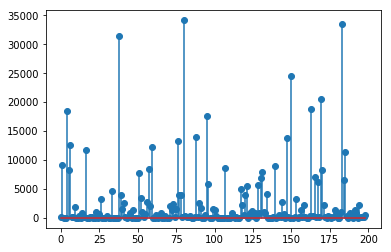

In [13]:
words_data=data_train.iloc[:,62:261];
words=words_data.sum(axis=0)
plt.pyplot.stem(words)

## Principal Component Analysis

In [12]:
pca = PCA(.95)
pca_data = pca.fit_transform(data_train)
print("Optimal number of components: ",pca.n_components_)
percent=pca.explained_variance_ratio_
print(percent)

Optimal number of components:  2
[0.94877217 0.04743174]


We found the optimal number of components for representing 95 percent of the data

Text(0.5, 1.0, '2 Component PCA')

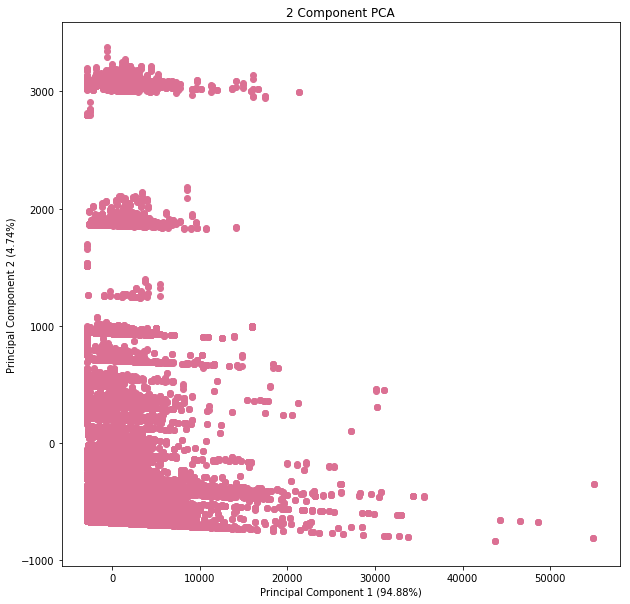

In [13]:
plt.pyplot.figure(figsize=(10,10))
x=pca_data[:,0]
y=pca_data[:,1]
percent1=np.around(percent[0]*100,decimals=2)
percent2=np.around(percent[1]*100,decimals=2)
plt.pyplot.scatter(x, y, color='palevioletred')
plt.pyplot.xlabel("Principal Component 1 ({}%)".format(percent1))
plt.pyplot.ylabel("Principal Component 2 ({}%)".format(percent2))
plt.pyplot.title("2 Component PCA")

But looking at explained variance ratio we notice that by the first variable we can explain almost 95% of the variance.

Text(0.5, 1.0, '1 Component PCA')

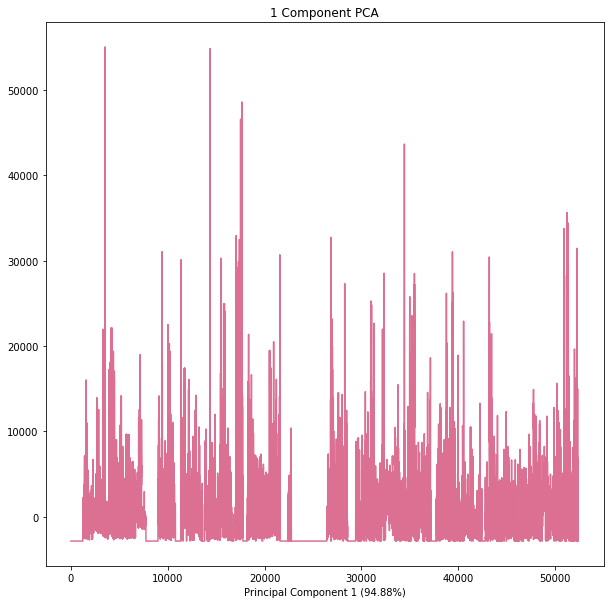

In [14]:
plt.pyplot.figure(figsize=(10,10))
x=pca_data[:,0]
percent1=np.around(percent[0]*100,decimals=2)
plt.pyplot.plot(x, color='palevioletred')
plt.pyplot.xlabel("Principal Component 1 ({}%)".format(percent1))
plt.pyplot.title("1 Component PCA")

## Feature selection

In [15]:
xtrain = data_train.iloc[:,0:280]
ytrain = data_train.iloc[:,280]

In [16]:
a_list = 10**np.linspace(-1,5, 7)
ratio = np.linspace(0,1, 20)
mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)

In our investigation we use 3 models: ridge, lasso and regression trees.

### Ridge

In [17]:
ridge = RidgeCV(alphas=a_list)
ridge_fit=ridge.fit(xtrain, ytrain)

In [18]:
print("The best alpha value is", ridge.alpha_)
print("Features selected", ridge.coef_.nonzero()[0].size)
print("The R^2 is ", ridge.score(xtrain,ytrain))
print("The MSE is", mean_squared_err(ytrain, ridge.predict(xtrain)))

The best alpha value is 100000.0
Features selected 276
The R^2 is  0.3591958466545243
The MSE of the best model is 911.0683523767748


### Lasso

In [19]:
lasso = LassoCV(alphas=a_list)
lasso.fit(xtrain, ytrain)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the

LassoCV(alphas=array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
    copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [20]:
print("The best alpha value is", lasso.alpha_)
print("Features selected", lasso.coef_.nonzero()[0].size)
print("The R^2 is ", lasso.score(xtrain,ytrain))
print("The MSE is", mean_squared_err(ytrain, lasso.predict(xtrain)))

The best alpha value is 0.1
Features selected 42
The R^2 is  0.35950920726591096
The MSE of the best model is 910.6228294593367


## Regression trees

In [21]:
regressor = DecisionTreeRegressor()

In [22]:
regressor.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [24]:
print("The R^2 is ", regressor.score(xtrain,ytrain))
print("The MSE is", mean_squared_err(ytrain, regressor.predict(xtrain)))

The R^2 is  0.9859704904314256
The MSE is 19.94656573395242


### Summary Table

| method | Feature selected | R-squared | MSE|
| ---| --- | --- |---| 
| Ridge |  276 | 0.3591|911.06|
| Lasso | 42 | 0.3595| 910.62|
| Regression trees | 280 | 0.9859| 19.946|

As we can see, for the linear models(ridge and lasso) we get a simmilar values of "MSE" and "R-squared" what means they equally fit well, but Ridge method requires more features than Lasso. Talking about regression tree, the result is very good, so there exists a risk that this model is overfitted. Let's check on test dataset.

## Testing on test dataset

In [30]:
xtest = data_test.iloc[:,0:280]
ytest = data_test.iloc[:,280]

### Ridge

In [31]:
print("The R^2 is ", ridge.score(xtest,ytest))
print("The MSE is", mean_squared_err(ytest, ridge.predict(xtest)))

The R^2 is  0.31320948668283966
The MSE of the best model is 638.8822531823035


### Lasso

In [32]:
print("The R^2 is ", lasso.score(xtest,ytest))
print("The MSE is", mean_squared_err(ytest, lasso.predict(xtest)))

The R^2 is  0.3145205841155523
The MSE of the best model is 637.6626136186875


### Regression trees

In [33]:
print("The R^2 is ", regressor.score(xtest,ytest))
print("The MSE is", mean_squared_err(ytest, regressor.predict(xtest)))

The R^2 is  -0.19877966565152594
The MSE of the best model is 1115.1567166550078


### Summary Table based on test set

| method | Feature selected | R-squared | MSE|
| ---| --- | --- |---| 
| Lasso | 42 | 0.3145| 637.66|
| Ridge | 276 | 0.3132| 638.88|
| Regression trees | 280 | -0.19877| 1115.15|

From results we can see that regression trees model performs very bad and we even get negative R^2 value, which means that our regression line is worse than using the mean value. So we can conclude that this model is overfitted.
Also, there are traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but Ridge and Lasso techniques are a great alternative when we are dealing with a large set of features.

So these models suit better for our dataset. The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in our case, because we have a huge number of features.